In [29]:
import gym
import pickle

from human import TerminalHuman
from keyboard_agent import *
from utils import *
from LearnAtariReward import *


In [30]:
env = gym.make('LunarLander-v2')

In [31]:
# save the demosntrations
# output = play(env, 0, save=False)
# res = play_rand(env, 15, 0, save=True)

In [32]:
res = ['1668105089.1177604',
 '1668105094.1521122',
 '1668105096.6714065',
 '1668105100.2791483',
 '1668105105.8747754',
 '1668105108.6929462',
 '1668105112.4706893',
 '1668105115.2749567',
 '1668105119.1750195',
 '1668105123.139814',
 '1668105125.4567327',
 '1668105128.4647155',
 '1668105131.5153224',
 '1668105135.0170794',
 '1668105138.4981039']

In [33]:
demo_path = 'data-rand/demonstrations/gym-'
demonstrations = [pickle.load(open(demo_path+ f'{demo_name}' + '.pickle', 'rb'), encoding='latin1') for demo_name in res] # load from files
# demos[demo #] = control, state

In [34]:
# sorted best to worst demos
sorted_demonstrations = [(states, controls) for controls, states, reward in sorted(demonstrations, key=lambda pair: pair[2])]
sorted_rewards = [reward for controls, states, reward in sorted(demonstrations, key=lambda pair: pair[2])]

In [35]:
min([len(demonstrations[i][0]) for i in range(len(demonstrations))])

62

In [36]:
num_trajs =  0
num_snippets = 6000
min_snippet_length =  min(np.min([len(d[0]) for d in sorted_demonstrations]), 30) #min length of trajectory for training comparison
maximum_snippet_length = 100
max_snippet_length = min(np.min([len(d[0]) for d in sorted_demonstrations]), maximum_snippet_length)

In [37]:
# auto labelling, but this can be done with preference ranking
training_obs, training_labels = create_training_data(sorted_demonstrations, num_trajs, num_snippets, min_snippet_length, max_snippet_length)

maximum traj length 31


In [38]:
lr = 0.00005
weight_decay = 0.0
num_iter = 20 #num times through training data
l1_reg=0.0

In [39]:
reward_net = Net(8)

import torch.optim as optim
optimizer = optim.Adam(reward_net.parameters(),  lr=lr, weight_decay=weight_decay)

reward_model_path = 'reward_model/model0.pth'

learn_reward(reward_net, optimizer, training_obs, training_labels, num_iter, l1_reg, reward_model_path) #path is where to save the model
#save reward network
torch.save(reward_net.state_dict(), reward_model_path)

cpu
epoch 0 loss 20.6466064453125
tensor(46.8758, grad_fn=<AddBackward0>)
check pointing
epoch 1 loss 0.00018344627460464835
tensor(81.3352, grad_fn=<AddBackward0>)
check pointing
epoch 2 loss 1.4185804502631072e-05
tensor(92.6812, grad_fn=<AddBackward0>)
check pointing
epoch 3 loss 0.1204914003610611
tensor(47.2961, grad_fn=<AddBackward0>)
check pointing
epoch 4 loss 4.623211860656738
tensor(40.4380, grad_fn=<AddBackward0>)
check pointing
epoch 5 loss 0.03510177880525589
tensor(42.8296, grad_fn=<AddBackward0>)
check pointing
epoch 6 loss 0.03865690901875496
tensor(30.1768, grad_fn=<AddBackward0>)
check pointing
epoch 7 loss 0.5046154856681824
tensor(25.6690, grad_fn=<AddBackward0>)
check pointing
epoch 8 loss 0.589774489402771
tensor(26.1441, grad_fn=<AddBackward0>)
check pointing
epoch 9 loss 0.0023808723781257868
tensor(42.1674, grad_fn=<AddBackward0>)
check pointing
epoch 10 loss 0.0018704315880313516
tensor(35.9783, grad_fn=<AddBackward0>)
check pointing
epoch 11 loss 0.0015192406

1st see how it learns reward "Network"

In [41]:
with torch.no_grad():
        pred_returns = [predict_traj_return(reward_net, traj[0]) for traj in sorted_demonstrations]
for i, p in enumerate(pred_returns):
    print(i,p,sorted_rewards[i])

0 -45.61058294773102 -362.18852614808526
1 -43.43515446782112 -217.61016424414632
2 -47.8729145526886 -189.99518832828852
3 -58.85412549972534 -159.36152768835598
4 -45.562394857406616 -146.1140926064082
5 -66.05725848674774 -137.5032035750756
6 -59.74751591682434 -135.85084168721104
7 -55.00501728057861 -110.27148638803381
8 -107.6347291469574 -106.96702195811058
9 -95.82809329032898 -94.48181129665147
10 -71.68154215812683 -90.10019050638121
11 -58.924809217453 -89.50723549407869
12 -63.55244028568268 -89.31660912002741
13 -73.50893867015839 -88.17919788862693
14 -56.49663424491882 -57.02610638521248


In [42]:
import matplotlib.pyplot as plt

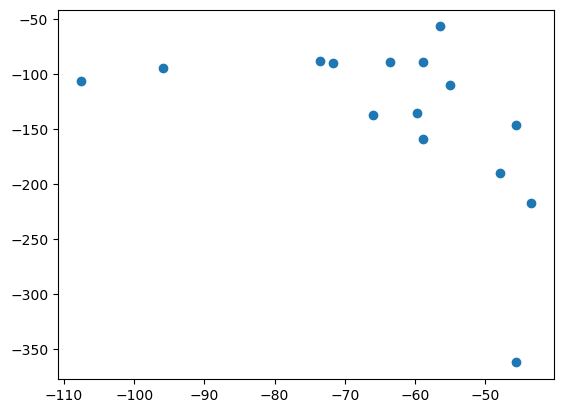

In [43]:
plt.scatter(pred_returns, sorted_rewards)

In [ ]:
# demo_names = ['1668059133.6913733', '1668059364.6035125', '1668059396.1789556', '1668059459.6041403', '1668091394.3350058', '1668091478.0278926']

In [ ]:
# demo_path = 'data/demonstrations/gym-'
# demos = [pickle.load(open(demo_path+ f'{demo_name}' + '.pickle', 'rb'), encoding='latin1') for demo_name in demo_names] # load from files
# demos[demo #] = control, state

In [ ]:
# H = TerminalHuman(env, 'approx')

In [ ]:
# out = H.input(demos)